# Grover's search algorithm
Grover's search algorithm is one of the more straightforward quantum algorithms for solving an actual problem using quantum computing quadratically faster than its classical counterpart. This exercise is losely based on the [Grover's algorithm and its Qiskit implementation Qiskit tutorial](https://quantum-computing.ibm.com/support/guides/quantum-algorithms-with-qiskit?page=5cc0d9fd86b50d00642353ca#experiment-with-simulators), which goes inte greater detail regarding the implementation and theory.

What we will demonstrate is an unstructured search of a database, using the so called amplitude amplification trick.

Let's start by importing the IBMQ method and load our account.

In [1]:
#initialization
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# importing Qiskit
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

# Qiskit Terra Grover implementation
In Qiskit terra we can create a Grover implementation using for example a phase oracle, which in combination with a phase ... inversion about average increases the amplitude of the "correct" answer acccording to the oracle.

In [30]:
"""
First we create a couple of single-solution boolean oracles that we can use to specify three qubit correct answers."""

def phase_oracle(circuit, register):
    if oracle_type=="000":
        circuit.x(qr)
        circuit.h(qr[2])
        circuit.ccx(qr[0],qr[1],qr[2])
        circuit.h(qr[2]) 
        circuit.x(qr)
    elif oracle_type=="001":
        circuit.x(qr)
        circuit.h(qr[2])
        circuit.ccx(qr[0],qr[1],qr[2])
        circuit.x(qr[1])
        circuit.h(qr[2]) 
        circuit.x(qr[2]) 
    elif oracle_type=="010":
        circuit.x(qr)
        circuit.h(qr[2])
        circuit.ccx(qr[0],qr[1],qr[2])
        circuit.h(qr[2]) 
        circuit.x(qr[2])
        circuit.x(qr[0])
    elif oracle_type=="011":
        circuit.x(qr)
        circuit.h(qr[2])
        circuit.ccx(qr[0],qr[1],qr[2])
        circuit.h(qr[2]) 
        circuit.x(qr[2])
    elif oracle_type=="100":
        circuit.x(qr[0])
        circuit.x(qr[1])
        circuit.h(qr[2])
        circuit.ccx(qr[0],qr[1],qr[2])
        circuit.x(qr[0])
        circuit.x(qr[1])
        circuit.h(qr[2])  
    elif oracle_type=="101":
        circuit.x(qr)
        circuit.h(qr[2])
        circuit.ccx(qr[0],qr[1],qr[2])
        circuit.x(qr[1])
        circuit.h(qr[2]) 
    elif oracle_type=="110":
        circuit.x(qr[0])
        circuit.h(qr[2])
        circuit.ccx(qr[0],qr[1],qr[2])
        circuit.x(qr[0])
        circuit.h(qr[2]) 
    elif oracle_type=="111":
        circuit.x(qr[2])
        circuit.ccx(qr[0],qr[1],qr[2])
        circuit.x(qr[2])
        circuit.h(qr)
        circuit.x(qr)


...

Enter type of oracle: 000, thru 111
>110
3
Oracle for: | 110 >


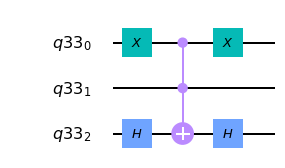

In [63]:
oracle_type=""
while len(oracle_type)!=3:
    oracle_type=str(input("Enter type of oracle: 000, thru 111\n>"))
    
print(len(oracle_type))
qr = QuantumRegister(3)
oracleCircuit = QuantumCircuit(qr)
phase_oracle(oracleCircuit, qr)
print("Oracle for: |", oracle_type,">")
display(oracleCircuit.draw(output="mpl"))


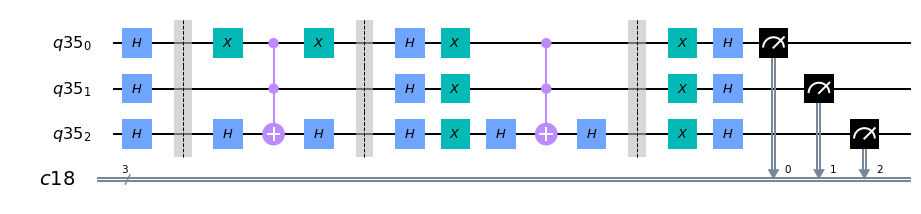

In [66]:
qr = QuantumRegister(3)
cr = ClassicalRegister(3)

groverCircuit = QuantumCircuit(qr,cr)
from math import pi
# initiate the Grover with Hadamards
groverCircuit.h(qr)
groverCircuit.barrier(qr)


phase_oracle(groverCircuit, qr)
#inversion_about_average(groverCircuit, qr, 3)

#inversion circuit
groverCircuit.barrier(qr)
groverCircuit.h(qr)
groverCircuit.x(qr)
groverCircuit.h(qr[2])
groverCircuit.ccx(qr[0],qr[1],qr[2])
groverCircuit.h(qr[2])
groverCircuit.barrier(qr)
groverCircuit.x(qr)
groverCircuit.h(qr)

"""#inversion circuit 2
groverCircuit.barrier(qr)
groverCircuit.h(qr)
groverCircuit.x(qr)
groverCircuit.h(qr[2])
groverCircuit.ccx(qr[0],qr[1],qr[2])
groverCircuit.h(qr[2])
groverCircuit.barrier(qr)
groverCircuit.x(qr)
groverCircuit.h(qr)"""

# add measurements
groverCircuit.measure(qr,cr)
groverCircuit.draw(output="mpl")


{'110': 797, '100': 36, '101': 28, '000': 26, '010': 29, '111': 37, '011': 40, '001': 31}


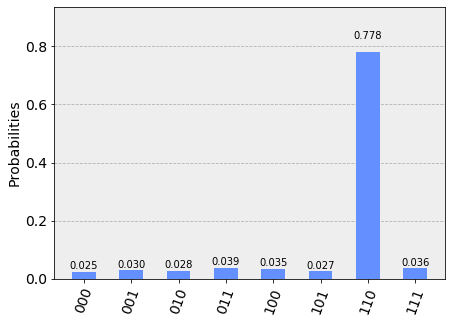

In [73]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(groverCircuit, backend=backend, shots=shots).result()
answer = results.get_counts()
print(answer)
display(plot_histogram(answer))


In [3]:
"""def n_controlled_Z(circuit, controls, target):
    """Implement a Z gate with multiple controls"""
    if (len(controls) > 2):
        raise ValueError('The controlled Z with more than 2 controls is not implemented')
    elif (len(controls) == 1):
        circuit.h(target)
        circuit.cx(controls[0], target)
        circuit.h(target)
    elif (len(controls) == 2):
        circuit.h(target)
        circuit.ccx(controls[0], controls[1], target)
        circuit.h(target)"""

In [4]:
"""def inversion_about_average(circuit, register, n):
    """Apply inversion about the average step of Grover's algorithm."""
    circuit.h(register)
    circuit.x(register)
    n_controlled_Z(circuit, [register[j] for j in range(n-1)], register[n-1])
    circuit.x(register)
    circuit.h(register)"""

# Qiskit Aqua Grover algorithm

In [68]:
# Do the necessary import for our program
#!pip install qiskit-aqua
from qiskit.aqua.algorithms import Grover
from qiskit.aqua.components.oracles import LogicalExpressionOracle, TruthTableOracle
from qiskit.compiler import transpile

In [69]:
oracle_method=str(input("Enter method for the oracle: Log (logical input) or Bit (truth table bit input)\n>"))

Enter method for the oracle: Log (logical input) or Bit (truth table bit input)
>Log


110
Log


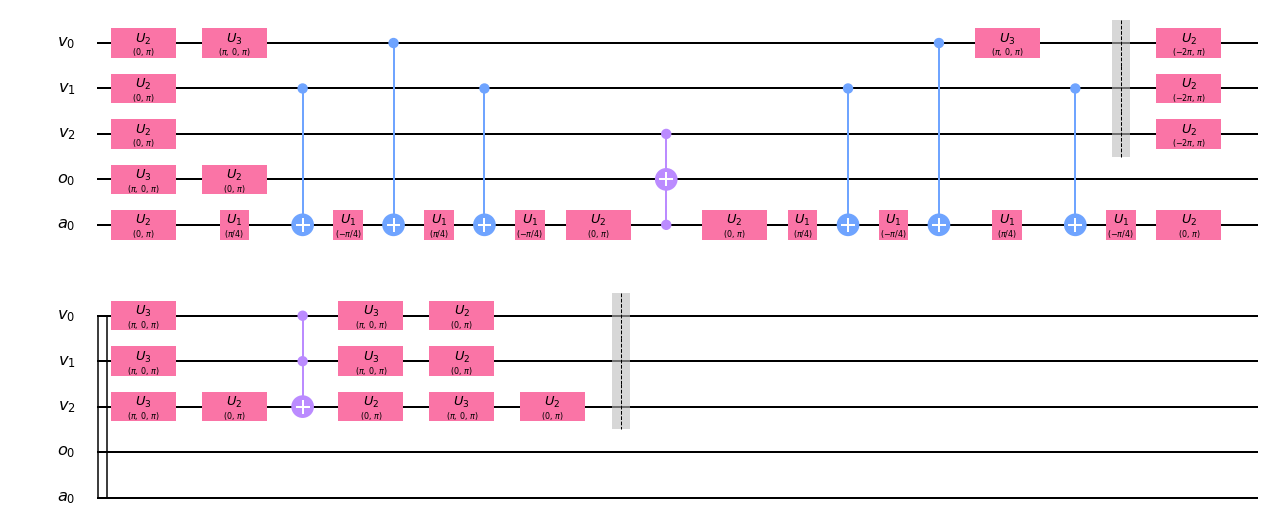

In [74]:
#oracle_method = "Bit" #<-"Log" or "Bit"
print(oracle_type)
print(oracle_method)


if oracle_type=="000111":   
    log_expr = '((~A & ~B & ~C) & (A & B & C))' #<- Oracle for |000> + |111>
    bitstr = '10000001'
elif oracle_type=="000":
    log_expr = '(~A & ~B & ~C)' #<- Oracle for |000>
    bitstr = '10000000'
elif oracle_type=="001":
    log_expr = '(A & ~B & ~C)' #<- Oracle for |110>
    bitstr = '01000000'  
elif oracle_type=="010":
    log_expr = '(~A & B & ~C)' #<- Oracle for |110>
    bitstr = '00100000'   
elif oracle_type=="011":
    log_expr = '(A & B & ~C)' #<- Oracle for |110>
    bitstr = '00010000'   
elif oracle_type=="100":
    log_expr = '(A & B & ~C)' #<- Oracle for |110>
    bitstr = '00001000' 
elif oracle_type=="101":
    log_expr = '(A & ~B & C)' #<- Oracle for |110>
    bitstr = '00000100' 
elif oracle_type=="110":
    log_expr = '(~A & B & C)' #<- Oracle for |110>
    bitstr = '00000010'    
elif oracle_type=="111":
    log_expr = '(A & B & C)' #<- Oracle for |111>
    bitstr = '00000001'

if oracle_method=="Log":
    algorithm = Grover(LogicalExpressionOracle(log_expr))
    circuit = Grover(LogicalExpressionOracle(log_expr)).construct_circuit()
else:
    algorithm = Grover(TruthTableOracle(bitstr))
    circuit = Grover(TruthTableOracle(bitstr)).construct_circuit()

circuit.draw(output="mpl")



110
{'110': 794, '101': 34, '100': 32, '000': 28, '010': 36, '111': 36, '011': 29, '001': 35}


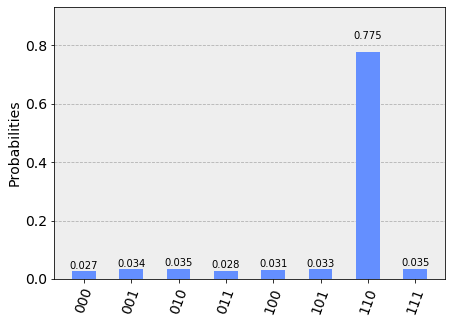

In [71]:
# Run the algorithm on a simulator, printing the most frequently occurring result
backend = BasicAer.get_backend('qasm_simulator')

result = algorithm.run(backend)
print(result['top_measurement'])
print(result['measurement'])
plot_histogram(result['measurement'])

In [ ]:
help(QuantumCircuit
    )